# Theory
In this section a short description of the data fields are provided.

## Total ion current
The total ion current (TIC) chromatogram represents the summed intensity across the entire range of masses being detected at every point in the analysis. The range is typically several hundred mass-to-charge units or more. In complex samples, the TIC chromatogram often provides limited information as multiple analytes elute simultaneously, obscuring individual species.[https://en.wikipedia.org/wiki/Mass_chromatogram]

![TIC](img/1280px-Total_ion_current_chromatogram.png)
An example of TIC chromatogram from an LC-MS analysis.

## Base peak intensity 
The base peak chromatogram is similar to the TIC chromatogram, however it monitors only the most intense peak in each spectrum. This means that the base peak chromatogram represents the intensity of the most intense peak at every point in the analysis. Base peak chromatograms often have a cleaner look and thus are more informative than TIC chromatograms because the background is reduced by focusing on a single analyte at every point.[https://en.wikipedia.org/wiki/Mass_chromatogram]

![BPI](img/1280px-Base_peak_chromatogram.png)
An example of BPI chromatogram from an LC-MS analysis.

## Base peak MZ
Base peak: The most intense (tallest) peak in a mass spectrum, due to the ion with the greatest relative abundance (relative intensity; height of peak along the spectrum's y-axis). Not to be confused with molecular ion: base peaks are not always molecular ions, and molecular ions are not always base peaks.

![ m/z = 91](img/base_peak01.jpg)
The electron impact ionization mass spectrum of PhCH2Cl, in which the base peak is a fragment ion having m/z = 91.

![ m/z = 16](img/base_peak02.jpg)
The electron impact ionization mass spectrum of PhCH2Cl, in which the base peak is a fragment ion having m/z = 91.[http://www.chem.ucla.edu/~harding/IGOC/B/base_peak.html]

## Ion
The amino acid ion. 

![ Ion list ](img/List-of-amino-acids-abbreviations.png)

## n
How many of the particles we have (e.g in 13C in the data we have 5 carbon in the proline sample.).

## AUC
Area under the curve. The area under the interpolated "gaussian" curve that fit the peaks (what peak was this now again? 


# About the data

## How the data is recorded.

There are different number of scans for the time that it is recording. For each scan we are looking at all the amino acids and the isotopes. If we run the experiment for 200 scans. In the perfect world we would have 200 data points for each experiment, which we could use to define a statistic that we could then use for measurement. 


# Loading libraries

In [4]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns#Understanding my variables


# Load data

In [70]:
# Read in data.
df = pd.read_csv("../data/MSMS/20200309_AminoAcid_Hyp_0.01_AGC_1_fit.csv")


# Data description
This section contains some data description.


## Shape

In [71]:
# Data details
df.shape


(10020, 16)

Data has 5931 samples and 16 columns.

## Head

In [57]:
df.head()


,seqNum,peak,I,mu,sigma,R2,isoshift,theorshift,masserror,isoratio,rt,tic,bpI,bpMZ,ion,n
0,1,0,2758.181618,116.070959,0.000268,0.997206,0.000000,0.000000,0.000000,1.000000,0.31747,1159673216,146976784,132.065918,P,NaN
1,1,13C,117.595174,117.074331,NaN,0.991695,1.003372,1.003355,0.000017,0.042635,0.31747,1159673216,146976784,132.065918,P,5.0
2,1,18O,7.223932,118.075271,NaN,0.917298,2.004311,2.004246,0.000066,0.002619,0.31747,1159673216,146976784,132.065918,P,2.0
3,1,0,46584.872660,132.065919,0.000326,0.998220,0.000000,0.000000,0.000000,1.000000,0.31747,1159673216,146976784,132.065918,Hyp,NaN
4,1,13C,2469.615085,133.069252,NaN,0.997956,1.003333,1.003355,-0.000022,0.053013,0.31747,1159673216,146976784,132.065918,Hyp,5.0


## Columns

In [58]:
df.columns

Index(['seqNum', 'peak', 'I', 'mu', 'sigma', 'R2', 'isoshift', 'theorshift',
       'masserror', 'isoratio', 'rt', 'tic', 'bpI', 'bpMZ', 'ion', 'n'],
      dtype='object')

__'seqNum'__ - Name of the scan number (the scanId).

__'peak'__ - Which isotop we are looking at. 0 means the monoisotopic peak, etc. 

__'I'__ - The area under the "gaussian" curve that is fitted on the data points.

__'mu'__ - M/Z ratio. Mass of the peak that we are looking at. 

__'sigma'__ - The sigma parameter for the "gaussian"-fit. 

__'R2'__ - The same as sigma. It described the gaussian fit for those data points. Fit of a true gaussian fit vs the actual fit. 

__'isoshift'__ - Actual shift that we see for the detected peak.

__'theorshift'__ - Actual theoretical shift.

__'masserror'__ - Difference between the isoshift and theorshift.

__'isoratio'__ - Ratio of the I/(I for the peak, which is 0 [monoisotopic peak]). E.g. The peak with 0 will always be 1 for isoratio because it will always be divided by itself (own area under the curve). This is the actual area under the curve for each peak. So eventually when we want to get it for individual elements we need to divide it by the individual number of atoms that we have for this specific element.  

__'rt'__ - Retention time. 

__'tic'__ - Total Ion Current. Which is the abundance of all the abundance in this specific scan. The rt and tic are dependent on the seqNum because when we are looking at seqNum 1. The retention time will always be the same. It doesnt matter if we go for different tic or different ion because it is still in the first scan.

__'bpI'__ - Base peak intensity. Which is the intensity of the base peak.

__'bpMZ'__- Base peak mass over charge ratio. Base peak in the spectrum, means the highest peak that we have. 

__'ion'__ - Is the name of the amino acid that we have. 

__'n'__ - N is the number of element for the peak that we have for the specific ion. For instance; for proline. We will look for the ion P and go for the peak; and for carbon we will have 4 number of carbons. Then n will be 4. If we go for hydrogen it will be 10. For nitrogen it will be 1. It also depends if we are looking at the MS data or the MSMS data. Becuase we have different structure and this different structure has a different number of atoms and elements. 


## Unique


In [59]:
df.nunique(axis=0)



seqNum         276
peak             5
I             9226
mu            9226
sigma         3111
R2            9226
isoshift      6116
theorshift       5
masserror     6116
isoratio      6116
rt             276
tic            276
bpI            276
bpMZ            11
ion             21
n               13
dtype: int64

Sigma is 2244, why is there not 2244 different sigmas? 

isoshift is 3688, why is this less than 5931?

theorshift is 5, why is theoretical shift 5?



## Description

In [72]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,seqNum,I,mu,sigma,R2,isoshift,theorshift,masserror,isoratio,rt,tic,bpI,bpMZ,n
count,10020.000000,10020.000000,10020.000000,3318.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,10020.000000,6702.000000
mean,281.240719,1255.353586,133.188642,0.000343,0.931736,0.821619,0.821697,-0.000078,0.603101,1524.305758,467497966.923752,127847148.250699,132.065911,4.722172
std,159.094395,6494.371027,21.952450,0.000100,0.103969,0.672013,0.672074,0.000309,1.555356,865.127087,31269615.952848,4550327.475229,0.000023,3.294859
min,2.000000,0.134707,76.030155,0.000103,0.501668,0.000000,0.000000,-0.002083,0.000399,5.896916,372696256.000000,112933304.000000,132.065857,1.000000
25%,142.000000,2.989101,119.083581,0.000279,0.911165,0.000000,0.000000,-0.000109,0.017290,767.141548,445587968.000000,124789376.000000,132.065887,2.000000
50%,284.000000,10.240122,133.072066,0.000332,0.985646,1.003036,1.003355,0.000000,0.139587,1539.269152,466663808.000000,127740624.000000,132.065918,4.000000
75%,418.000000,85.806964,148.084400,0.000410,0.996529,1.005761,1.006277,0.000000,1.000000,2267.993210,490740384.000000,131088008.000000,132.065933,6.000000
max,552.000000,43834.394590,177.124458,0.000591,0.999659,2.005596,2.004246,0.001444,34.579208,2996.694482,545693056.000000,138738640.000000,132.065964,15.000000


In [61]:
df.isoshift.unique()


array([0.        , 1.00337168, 2.00431146, ..., 1.00308055, 0.99638326,
       2.00388222])

In [62]:
df.theorshift.unique()


array([0.        , 1.00335484, 2.00424578, 0.99703496, 1.00627675])

Should we concatenate isoshift to 5 different levels just like theor-shift?

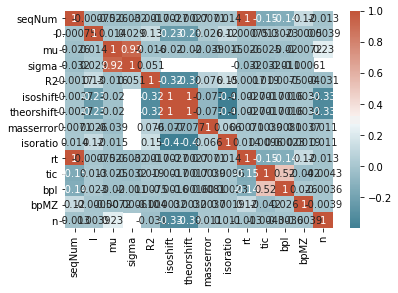

In [63]:
# calculate correlation matrix
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Do we need to normalize the data somehow?

In [73]:
df.peak

0          0
1        13C
2        15N
3         2H
4        18O
        ... 
10015    18O
10016      0
10017    15N
10018      0
10019    15N
Name: peak, Length: 10020, dtype: object

# Analysis

In [74]:
df.peak.unique()

array(['0', '13C', '15N', '2H', '18O'], dtype=object)

In [75]:
df.ion.unique()

array(['P', 'L', 'R', 'Hyl', 'A', 'S', 'V', 'N', 'Q', 'E', 'T', 'Pyr',
       'M', 'F', 'Hyp', 'K', 'G', 'D', 'C', 'H'], dtype=object)